In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# check pytorch version
torch.__version__

'1.12.1+cu102'

In [76]:
weight = 0.7
bias = 0.3


start = 0 
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [77]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [78]:
print(len(X), len(y))

50 50


In [79]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [80]:
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [130]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    '''
    Plots train and test data. Compares predictions
    '''
    
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels,c='b',s=4,label='training data')
    plt.scatter(test_data, test_labels, c='g',s=4,label='testing data')
    
    if predictions is not None:
        plt.scatter(test_data, predictions,c='r', s=4,label='predictions')
    
    plt.legend(prop={'size':14})

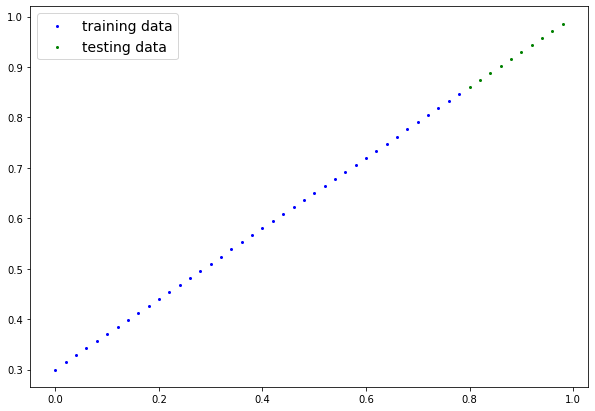

In [131]:
plot_predictions()

# Model

In [170]:
class LinearRegressionModel(nn.Module): # class inherits from nn.Module.
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float32))
        self.bias = nn.Parameter(torch.randn(1, 
                                             requires_grad=True,
                                             dtype=torch.float32))
    
    # Forward method to define the computation in the model
    def forward(self, x: torch.tensor) -> torch.tensor:
        return self.weights * x + self.bias

In [171]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()

In [172]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [173]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

## Initial predictions

In [174]:
with torch.inference_mode(): 
    y_preds = model_0(X_test)

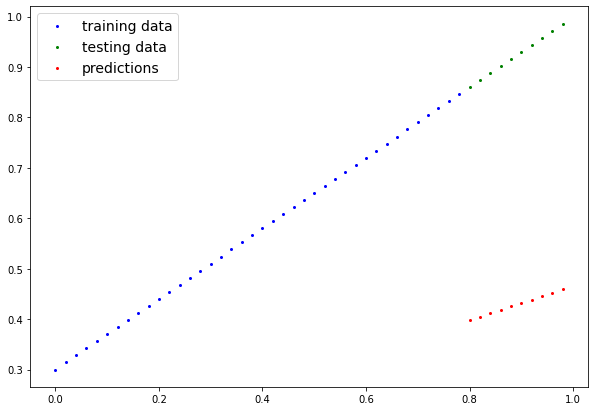

In [175]:
plot_predictions(predictions=y_preds)

## Improving predictions

1. Loss function: measure of error
2. Optimiser: minimises the loss / error
3. Training / testing loop

In [176]:
# loss function
loss_fn = nn.L1Loss()

# objective 
optimizer = torch.optim.SGD(params=model_0.parameters(), 
                      lr=0.001)

### Training loop
0. Loop thru data
1. Forward pass - aka forward prop
2. Calculate loss, compare forward pass pred to labels
3. Optimiser zero grad
4. Loss backward 
5. Optimiser step

In [177]:
epochs = 1000
epoch_count = []
loss_values = []
test_loss_values = []

# step 0
for epoch in range(epochs):
    
    # model in train mode
    model_0.train()
    
    # step 1
    y_pred = model_0(X_train)
    
    # step 2
    loss = loss_fn(y_pred, y_train)
    
    # step 3
    optimizer.zero_grad()
    
    # step 4 
    loss.backward()
    
    # step 5
    optimizer.step()
    
    # testing
    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test)
    
    if epoch%10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print("epoch:", epoch, ', Loss', loss, ', Test loss', test_loss)
        print('Loss:', loss)

epoch: 0 , Loss tensor(0.3129, grad_fn=<L1LossBackward0>) , Test loss tensor(0.4932)
Loss: tensor(0.3129, grad_fn=<L1LossBackward0>)
epoch: 10 , Loss tensor(0.3014, grad_fn=<L1LossBackward0>) , Test loss tensor(0.4797)
Loss: tensor(0.3014, grad_fn=<L1LossBackward0>)
epoch: 20 , Loss tensor(0.2898, grad_fn=<L1LossBackward0>) , Test loss tensor(0.4662)
Loss: tensor(0.2898, grad_fn=<L1LossBackward0>)
epoch: 30 , Loss tensor(0.2783, grad_fn=<L1LossBackward0>) , Test loss tensor(0.4528)
Loss: tensor(0.2783, grad_fn=<L1LossBackward0>)
epoch: 40 , Loss tensor(0.2668, grad_fn=<L1LossBackward0>) , Test loss tensor(0.4393)
Loss: tensor(0.2668, grad_fn=<L1LossBackward0>)
epoch: 50 , Loss tensor(0.2553, grad_fn=<L1LossBackward0>) , Test loss tensor(0.4258)
Loss: tensor(0.2553, grad_fn=<L1LossBackward0>)
epoch: 60 , Loss tensor(0.2438, grad_fn=<L1LossBackward0>) , Test loss tensor(0.4124)
Loss: tensor(0.2438, grad_fn=<L1LossBackward0>)
epoch: 70 , Loss tensor(0.2322, grad_fn=<L1LossBackward0>) , Te

In [178]:
with torch.inference_mode():
    y_pred = model_0(X_test)

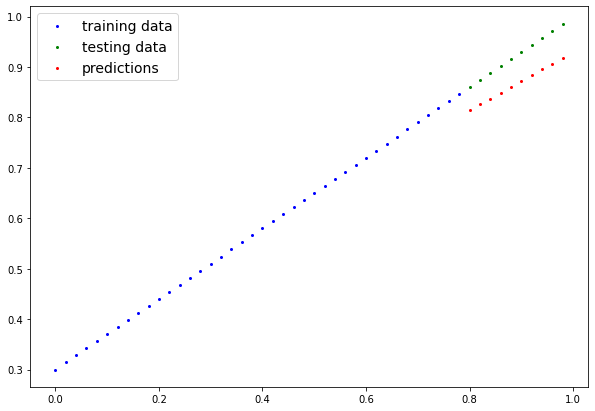

In [179]:
plot_predictions(predictions=y_pred)

In [180]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5788])), ('bias', tensor([0.3509]))])

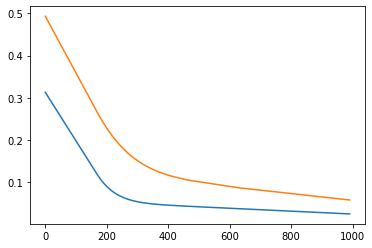

In [197]:
import numpy as np
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()))
plt.plot(epoch_count, test_loss_values)